# CLOUD COMPUTING AND BIG DATA _ PROJECT 1

## Simple Linear Regression On Databricks Cluster
### Group: Cloud Bricks
#### Members: Melaku, Yannick, Taige
##### Nov 11th, 2023

In [0]:
#Environment setup
import os
import sys

In [0]:
#SparkSession is the driver engine of the whole progam
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [0]:
# Importing the dataset

df = spark.read.csv( '/FileStore/tables/auto_mpd_data-1.csv', sep=',', inferSchema=True, header=False)

In [0]:
df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: string (nullable = true)



In [0]:
# Printing the first 5 rows of the dataset

df.show(5)

+----+---+-----+---+----+----+---+---+--------------------+
| _c0|_c1|  _c2|_c3| _c4| _c5|_c6|_c7|                 _c8|
+----+---+-----+---+----+----+---+---+--------------------+
|18.0|  8|307.0|130|3504|12.0| 70|  1|chevrolet chevell...|
|15.0|  8|350.0|165|3693|11.5| 70|  1|   buick skylark 320|
|18.0|  8|318.0|150|3436|11.0| 70|  1|  plymouth satellite|
|16.0|  8|304.0|150|3433|12.0| 70|  1|       amc rebel sst|
|17.0|  8|302.0|140|3449|10.5| 70|  1|         ford torino|
+----+---+-----+---+----+----+---+---+--------------------+
only showing top 5 rows



In [0]:
# We rename our columns since our dataset don't have columns name

df = df.toDF('mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name')

In [0]:
# show the 10 first rows of the dataset
df.show(10)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
|15.0|        8|       429.0|       198|  4341|        10.0|        70|     1|    ford galaxie 500|
|14.0|        8|       454.0|       220|  4354|         9.0|        70|     1|    chevrolet impala|


In [0]:
# print the shape of our dataset

print("Number of rows is:", df.count())
print("Number of columns is:", len(df.columns))

Number of rows is: 398
Number of columns is: 9


In [0]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+--------------------+
|summary|               mpg|         cylinders|      displacement|        horsepower|           weight|      acceleration|       model year|            origin|            car name|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+--------------------+
|  count|               398|               398|               398|               392|              398|               398|              398|               398|                 398|
|   mean|23.514572864321615| 5.454773869346734|193.42587939698493|104.46938775510205|2970.424623115578|15.568090452261291|76.01005025125629|1.5728643216080402|                NULL|
| stddev| 7.815984312565782|1.7010042445332094|104.26983817119581| 38.49115993282855|846.841774

In [0]:
df.columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [0]:
df.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- displacement: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- model year: integer (nullable = true)
 |-- origin: integer (nullable = true)
 |-- car name: string (nullable = true)



In [0]:
#Search missing value
for col in df.columns:
    print('No. of cells in column',col, 'with missing values:', df.filter(df[col].isNull()).count())

No. of cells in column mpg with missing values: 0
No. of cells in column cylinders with missing values: 0
No. of cells in column displacement with missing values: 0
No. of cells in column horsepower with missing values: 6
No. of cells in column weight with missing values: 0
No. of cells in column acceleration with missing values: 0
No. of cells in column model year with missing values: 0
No. of cells in column origin with missing values: 0
No. of cells in column car name with missing values: 0


## **We have 6 missing value in columns Horsepower**


In [0]:
#Search the median of the Horsepower  columns
from pyspark.sql.functions import avg
df.select(avg(df['horsepower'])).show()

+------------------+
|   avg(horsepower)|
+------------------+
|104.46938775510205|
+------------------+



In [0]:
# fill the missing value with the median
df1 = df.fillna({'horsepower':104})

In [0]:
df1.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [0]:
for col in df1.columns:
    print('No. of cells in column',col, 'with missing values:', df1.filter(df1[col].isNull()).count())

No. of cells in column mpg with missing values: 0
No. of cells in column cylinders with missing values: 0
No. of cells in column displacement with missing values: 0
No. of cells in column horsepower with missing values: 0
No. of cells in column weight with missing values: 0
No. of cells in column acceleration with missing values: 0
No. of cells in column model year with missing values: 0
No. of cells in column origin with missing values: 0
No. of cells in column car name with missing values: 0


### **Now we don't have any missing value in our data**

## Let check the duplicate value

In [0]:
columns_to_check = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

duplicated_rows = df1.groupby(columns_to_check).count().filter("count > 1")

In [0]:
duplicated_rows.show()

+---+---------+------------+----------+------+------------+----------+------+--------+-----+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name|count|
+---+---------+------------+----------+------+------------+----------+------+--------+-----+
+---+---------+------------+----------+------+------------+----------+------+--------+-----+



### There is no duplicated rows in our dataset

### Exploratory Data Analysis (EDA)

### Univariate analysis

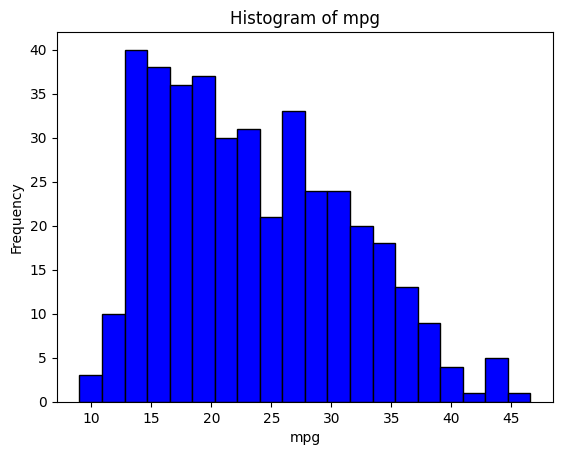

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("HistogramPlot").getOrCreate()

columns_to_plot = 'mpg'

# Extract the column data as a Pandas Series
column_data = df1.select(columns_to_plot).toPandas()[columns_to_plot]

# Plot the histogram using matplotlib
plt.hist(column_data, bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel(columns_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {columns_to_plot}")

# Show the plot
plt.show()

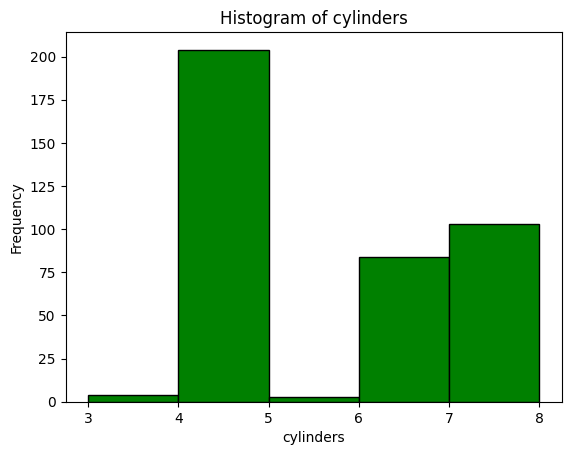

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("HistogramPlot").getOrCreate()

columns_to_plot = 'cylinders'

# Extract the column data as a Pandas Series
column_data = df1.select(columns_to_plot).toPandas()[columns_to_plot]

# Plot the histogram using matplotlib
plt.hist(column_data, bins=5, color='green', edgecolor='black')

# Add labels and title
plt.xlabel(columns_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {columns_to_plot}")

# Show the plot
plt.show()

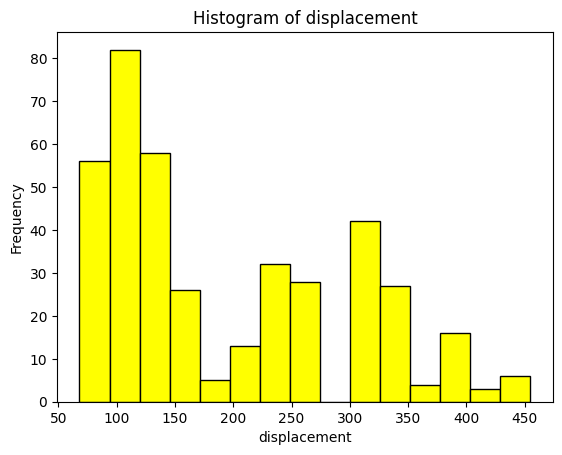

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("HistogramPlot").getOrCreate()

columns_to_plot ='displacement'

# Extract the column data as a Pandas Series
column_data = df1.select(columns_to_plot).toPandas()[columns_to_plot]

# Plot the histogram using matplotlib
plt.hist(column_data, bins=15, color='yellow', edgecolor='black')

# Add labels and title
plt.xlabel(columns_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {columns_to_plot}")

# Show the plot
plt.show()

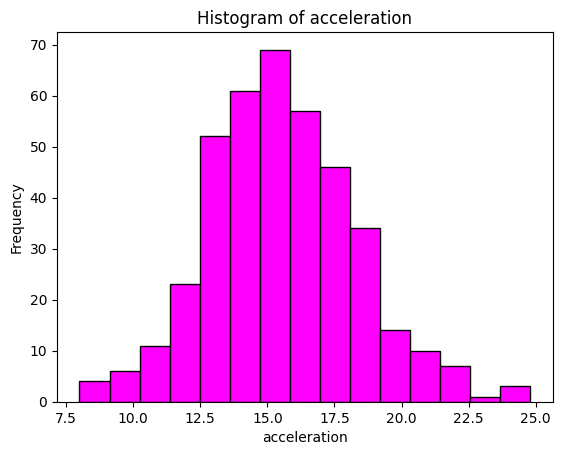

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("HistogramPlot").getOrCreate()

columns_to_plot = 'acceleration'

# Extract the column data as a Pandas Series
column_data = df1.select(columns_to_plot).toPandas()[columns_to_plot]

# Plot the histogram using matplotlib
plt.hist(column_data, bins=15, color='magenta', edgecolor='black')

# Add labels and title
plt.xlabel(columns_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {columns_to_plot}")

# Show the plot
plt.show()

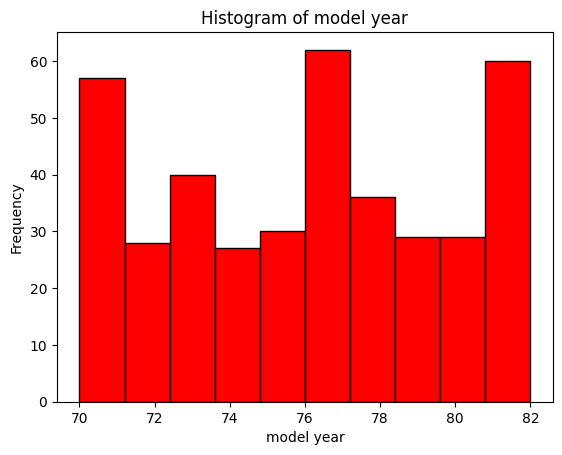

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("HistogramPlot").getOrCreate()

columns_to_plot = 'model year'

# Extract the column data as a Pandas Series
column_data = df1.select(columns_to_plot).toPandas()[columns_to_plot]

colors = ['red']

# Plot the histogram using matplotlib
plt.hist(column_data, bins=10, color=colors, edgecolor='black')

# Add labels and title
plt.xlabel(columns_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {columns_to_plot}")

# Show the plot
plt.show()

In [0]:
import seaborn as sns

### Bivariate analysis (continuous vs continuous)

### We will plot Heatmap to show correlation between continuous variable

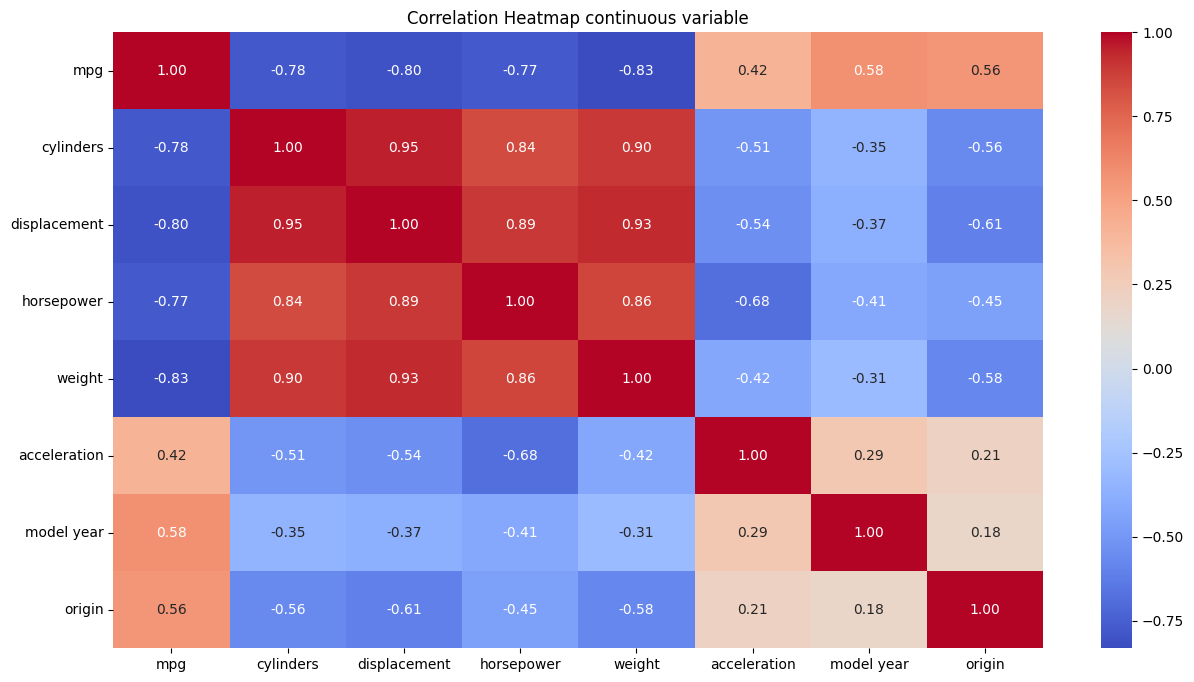

In [0]:
# Specify the columns for the heatmap
columns_for_heatmap = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df1.select(*columns_for_heatmap).toPandas()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(pandas_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Add labels and title
plt.title("Correlation Heatmap continuous variable")
plt.show()

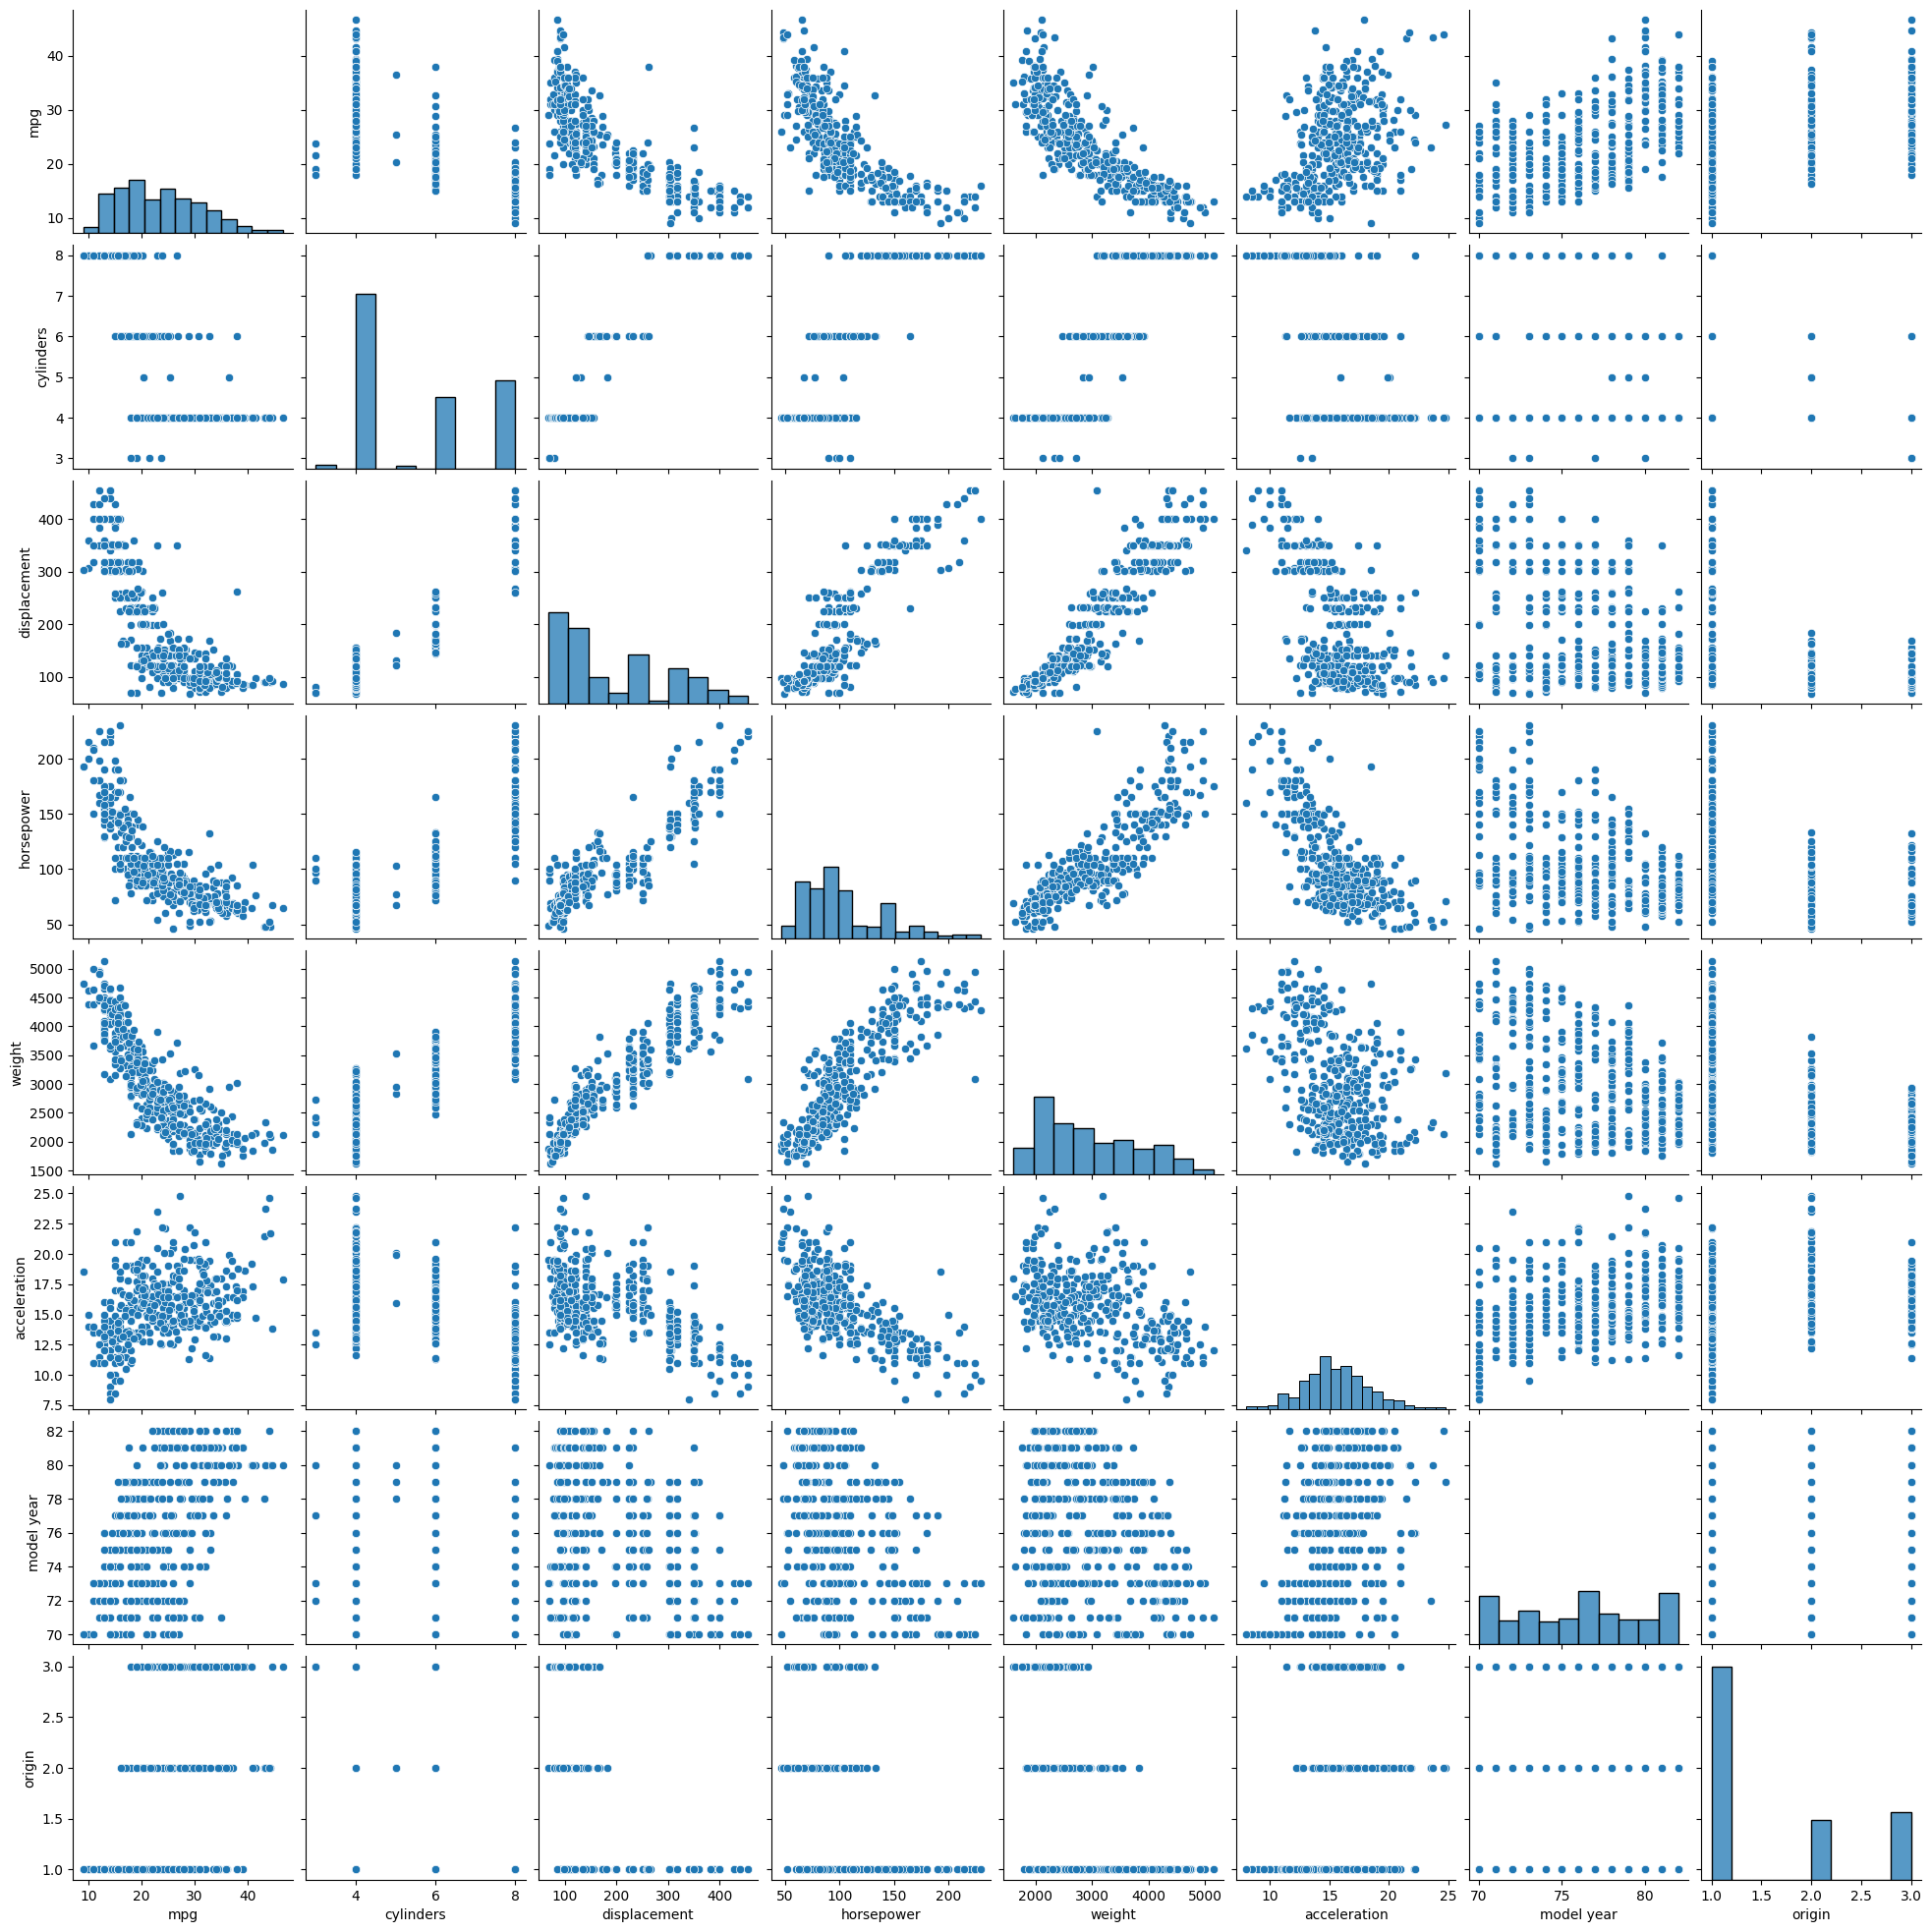

In [0]:
# Specify the columns for the scatter plot
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df1.select(*columns).toPandas()

# Create a pairplot using seaborn
sns.pairplot(pandas_df)

# Show the plot
plt.show()

### Features engineering

We will encode Categorical variable "Car Name"

In [0]:
# Label encoding
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="car name", outputCol="car name_indexed")
df = indexer.fit(df1).transform(df1)

In [0]:
df.show(10)

+----+---------+------------+----------+------+------------+----------+------+--------------------+----------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|car name_indexed|
+----+---------+------------+----------+------+------------+----------+------+--------------------+----------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|            28.0|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|            83.0|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|           244.0|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|            65.0|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|           185.0|
|15.0|        8|       429.0|       198|  4341|        10.0|    

In [0]:
df_LabelEncoded = df.alias('df_LabelEncoded')

In [0]:
# We will drop 'car name'
df = df.drop('car name')

In [0]:
df.show(5)

+----+---------+------------+----------+------+------------+----------+------+----------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name_indexed|
+----+---------+------------+----------+------+------------+----------+------+----------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|            28.0|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|            83.0|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|           244.0|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|            65.0|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|           185.0|
+----+---------+------------+----------+------+------------+----------+------+----------------+
only showing top 5 rows



## Linear Regression Model

In [0]:
# Linear regression model to train

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

feature_col = [column for column in df.columns if column != 'mpg']

# Combine all feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_col, outputCol='features')
df_combined = assembler.transform(df)

In [0]:
df_combined.show(5)

+----+---------+------------+----------+------+------------+----------+------+----------------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name_indexed|            features|
+----+---------+------------+----------+------+------------+----------+------+----------------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|            28.0|[8.0,307.0,130.0,...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|            83.0|[8.0,350.0,165.0,...|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|           244.0|[8.0,318.0,150.0,...|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|            65.0|[8.0,304.0,150.0,...|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|           185.0|[8.0,302.0,140.0,...|
+----+---------+------------+----------+------+------------+----

#### Train and Test our dataset

In [0]:
X_train, y_test = df_combined.randomSplit([0.8, 0.2],seed = 123)

# Show the sizes of the training and testing sets
print("Training set size:", X_train.count())
print("Testing set size:", y_test.count())

Training set size: 318
Testing set size: 80


###### We will Define the linear regression model

In [0]:

lr = LinearRegression(featuresCol='features', labelCol='mpg')

# Fit the model to the training data
lr_model = lr.fit(X_train)

### Evaluation

#### Training score

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the training set
prediction_train = lr_model.transform(X_train)

# Evaluate the model using the RegressionEvaluator
evaluator_train = RegressionEvaluator(labelCol="mpg", predictionCol="prediction", metricName="rmse")

rmse = evaluator_train.evaluate(prediction_train)
r2 = evaluator_train.setMetricName("r2").evaluate(prediction_train)


# Print the root mean squared error (RMSE) and R square on training data
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R square on train data is: {r2}")

Root Mean Squared Error (RMSE): 3.2667214421735147
R square on train data is: 0.8268984349073402


In [0]:
# Let check the coefficient and the intercept
print("Coefficients: " + str(lr_model.coefficients))

print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.21546549737091444,0.01959486366844995,-0.015194433831021271,-0.007013799904421566,0.04468885958396798,0.7844736238860017,1.4870608730484467,0.0030208734076373873]
Intercept: -19.812096127790454


#####  1- The model has a reasonably low RMSE (3.267), suggesting good predictive performance
#####  2- The R² value of 0.83 indicates that a significant portion of the variability in the MPG is captured by the model, indicating a good fit. This model explains about 83% of the variance in the mpg variable


#### Test score

In [0]:
# Make predictions on the test set
prediction_test = lr_model.transform(y_test)

# Evaluate the model using the RegressionEvaluator
evaluator_test = RegressionEvaluator(labelCol="mpg", predictionCol="prediction", metricName="rmse")
rmse_test = evaluator_test.evaluate(prediction_test)
r2_test = evaluator_test.setMetricName("r2").evaluate(prediction_test)

# Print the root mean squared error (RMSE_test)
print(f"Root Mean Squared Error (RMSE_test): {rmse_test}")
print(f"R square on test data is: {r2_test}")

Root Mean Squared Error (RMSE_test): 3.4356654033857685
R square on test data is: 0.7955505484415456


In [0]:
## Show the prediction
prediction_test.select('prediction','mpg').show(10)

+------------------+----+
|        prediction| mpg|
+------------------+----+
| 7.401101925998134|10.0|
|10.316163623653068|11.0|
|  8.71661292156194|12.0|
|21.594600179273705|13.0|
|  17.2369983019451|13.0|
|11.364894025285082|13.0|
| 8.264304063008623|13.0|
| 6.098549501414553|13.0|
| 13.40036992780854|14.0|
|10.092528011510204|14.0|
+------------------+----+
only showing top 10 rows



##### 1- The model has a reasonably low RMSE_test (3.43), suggesting good predictive performance on new data
##### 2- The R² test value of 0.80 on the test set indicates that the model maintains a good level of explanatory power when applied to previously unseen dat2

#### Conclusion: These results suggest that our linear regression model is performing well on both the training and testing sets, demonstrating good predictive and generalization capabilities

### END
#### THANK YOU

In [0]:
spark.stop()